In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "winequality-red.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/red-wine-quality-cortez-et-al-2009",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/cm/9rjzvcbn783456m0cwxvszdh0000gn/T/ipykernel_6159/1307085013.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  

In [7]:
# Step 3: Explore Dataset
print(df.head())
print(df.info())
print(df.describe())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

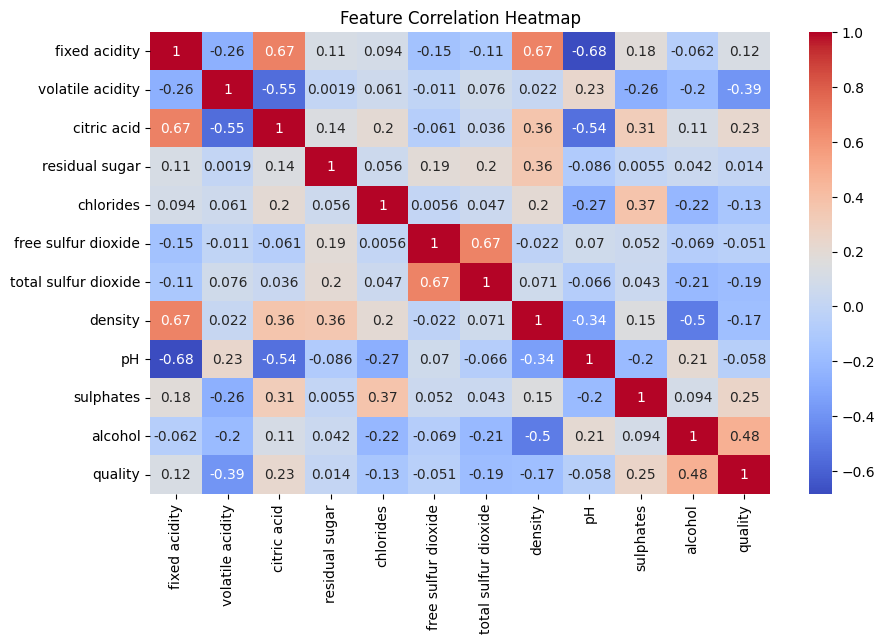

In [8]:
# Step 4: Visualize Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



In [9]:
# Step 5: Feature and Target
X = df.drop('quality', axis=1)
y = df['quality']



In [10]:
# Optional: Combine classes if very imbalanced (simplifies classification)
# y = y.apply(lambda x: 'low' if x <= 5 else 'high')

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [12]:
# Step 8: Train Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SGD Classifier': SGDClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        'Accuracy': acc,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }



/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [13]:
# Step 9: Show Results
for name, res in results.items():
    print(f"\n=== {name} ===")
    print(f"Accuracy: {res['Accuracy']:.2f}")
    print("Confusion Matrix:\n", res['Confusion Matrix'])
    print("Classification Report:\n", res['Classification Report'])




=== Random Forest ===
Accuracy: 0.66
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 96 33  1  0]
 [ 0  0 31 92  8  1]
 [ 0  0  0 18 23  1]
 [ 0  0  0  1  4  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320


=== SGD Classifier ===
Accuracy: 0.54
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 1  0  7  2  0  0]
 [ 0  0 99 28  3  0]
 [ 0  0 59 61 12  0]
 [ 0  0  2 26 14  0]
 [ 0  0  0  4  1  0]]
Classification Report:
               precision    recall  f1-sc

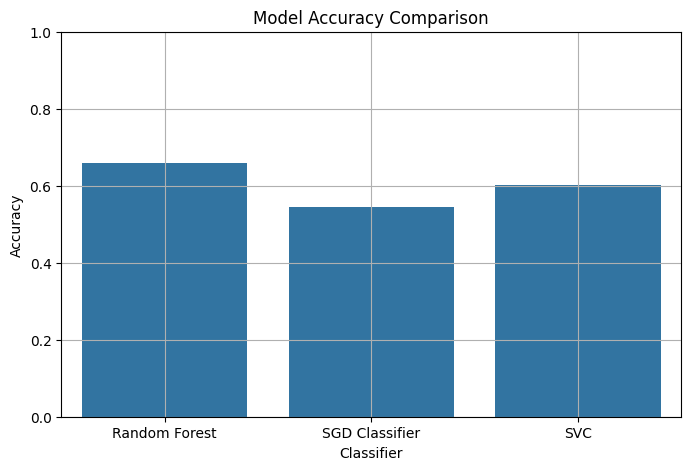

In [14]:
# Step 10: Visualization (Accuracy Comparison)
acc_values = [res['Accuracy'] for res in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=acc_values)
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.grid(True)
plt.show()
